## Test on L2 data
https://github.com/blaylockbk/pyBKB_v3/blob/master/BB_GOES/mapping_GOES16_FireTemperature.ipynb

In [16]:
import numpy as np
from datetime import datetime, timedelta
import os
os.environ["PROJ_LIB"] = "/home/darp_lord/Installs/anaconda3/envs/Flameboyant/share/proj/"; #fixr
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

DATA_DIR = "../Data/"
GOES_DIR = DATA_DIR+"GOES/"

data = xarray.open_dataset(GOES_DIR+"L2/276/OR_ABI-L2-MCMIPC-M6_G16_s20202760011160_e20202760013533_c20202760014078.nc")
data

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.128212 ... 0.044268005
  * x                                       (x) float32 -0.101332 ... 0.038612
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    band_wavelength_C02                     (band) float32 ...
    band_wavelength_C03                     (band) float32 ...
    band_wavelength_C04                     (band) float32 ...
    band_wavelength_C05                     (band) float32 ...
    band_wavelength_C06                     (band) float32 ...
    band_wavelength_C07                     (band) float32 ...
    band_wavelength_C08                     (band) float32 ...
    band_wavelength_C09                     (band) float32 ...
    band_wavelength_C10                     (band) float32 ...
    band_wavelength_C11                     (band) float32 ...
    band_wavelength_C12                     (band) float32 ...
    band_wavelength_C13                     (band) float32 ...
    band_wavelength_C14                     (band) float32 ...
    band_wavelength_C15                     (band) float32 ...
    band_wavelength_C16                     (band) float32 ...
    band_id_C01                             (band) int8 ...
    band_id_C02                             (band) int8 ...
    band_id_C03                             (band) int8 ...
    band_id_C04                             (band) int8 ...
    band_id_C05                             (band) int8 ...
    band_id_C06                             (band) int8 ...
    band_id_C07                             (band) int8 ...
    band_id_C08                             (band) int8 ...
    band_id_C09                             (band) int8 ...
    band_id_C10                             (band) int8 ...
    band_id_C11                             (band) int8 ...
    band_id_C12                             (band) int8 ...
    band_id_C13                             (band) int8 ...
    band_id_C14                             (band) int8 ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
Dimensions without coordinates: band, number_of_image_bounds, number_of_time_bounds
Data variables:
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    CMI_C04                                 (y, x) float32 ...
    DQF_C04                                 (y, x) float32 ...
    CMI_C05                                 (y, x) float32 ...
    DQF_C05                                 (y, x) float32 ...
    CMI_C06                                 (y, x) float32 ...
    DQF_C06                                 (y, x) float32 ...
    CMI_C07                                 (y, x) float32 ...
    DQF_C07                                 (y, x) float32 ...
    CMI_C08                                 (y, x) float32 ...
    DQF_C08                                 (y, x) float32 ...
    CMI_C09                                 (y, x) float32 ...
    DQF_C09                                 (y, x) float32 ...
    CMI_C10                                 (y, x) float32 ...
    DQF_C10                                 (y, x) float32 ...
    CMI_C11                                 (y, x) float32 ...
    DQF_C11                                 (y, x) float32 ...
    CMI_C12                                 (y, x) float

In [17]:
data['CMI_C01']

<xarray.DataArray 'CMI_C01' (y: 1500, x: 2500)>
[3750000 values with dtype=float32]
Coordinates:
    t        datetime64[ns] 2020-10-02T00:12:34.733602944
  * y        (y) float32 0.128212 0.128156 ... 0.044324003 0.044268005
  * x        (x) float32 -0.101332 -0.101276 ... 0.038556002 0.038612
    y_image  float32 0.08624
    x_image  float32 -0.03136
Attributes:
    long_name:              ABI Cloud and Moisture Imagery reflectance factor
    standard_name:          toa_lambertian_equivalent_albedo_multiplied_by_co...
    sensor_band_bit_depth:  10
    downsampling_method:    average
    valid_range:            [   0 4095]
    units:                  1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: sum (interval: 0.000028 rad)
    ancillary_variables:    DQF_C01

In [18]:


# Scan's start time, converted to datetime object
scan_start = datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end = datetime.strptime(data.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(data.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
# I'm not a fan of numpy datetime, so I convert it to a regular datetime object
midpoint = str(data['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : %s' % scan_start)
print('Scan midpoint : %s' % scan_mid)
print('Scan End      : %s' % scan_end)
print('File Created  : %s' % file_created)
print('Scan Duration : %.2f minutes' % ((scan_end-scan_start).seconds/60))


Scan Start    : 2020-10-02 00:11:16
Scan midpoint : 2020-10-02 00:12:34.700000
Scan End      : 2020-10-02 00:13:53.300000
File Created  : 2020-10-02 00:14:07.800000
Scan Duration : 2.62 minutes


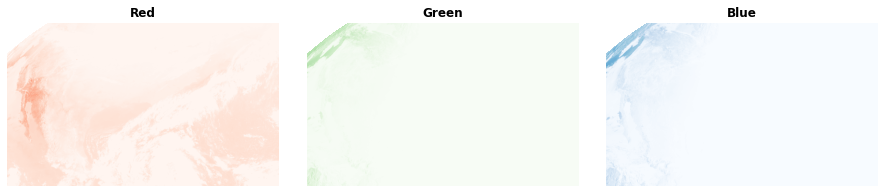

In [19]:
R = data['CMI_C07'].data
G = data['CMI_C06'].data
B = data['CMI_C05'].data


# Normalize each channel by the appropriate range of values  e.g. R = (R-minimum)/(maximum-minimum)
R = (R-273)/(333-273)
G = (G-0)/(1-0)
B = (B-0)/(0.75-0)

# Apply range limits for each channel. RGB values must be between 0 and 1
R = np.clip(R, 0, 1)
G = np.clip(G, 0, 1)
B = np.clip(B, 0, 1)

# Apply the gamma correction to Red channel.
#   corrected_value = value^(1/gamma)
gamma = 0.4
R = np.power(R, 1/gamma)

# The final RGB array :)
RGB = np.dstack([R, G, B])

fig, ([ax1, ax2, ax3]) = plt.subplots(1, 3, figsize=(16,3))

ax1.imshow(R, cmap='Reds', vmax=1, vmin=0)
ax1.set_title('Red', fontweight='semibold')
ax1.axis('off');

ax2.imshow(G, cmap='Greens', vmax=1, vmin=0)
ax2.set_title('Green', fontweight='semibold')
ax2.axis('off');

ax3.imshow(B, cmap='Blues', vmax=1, vmin=0)
ax3.set_title('Blue', fontweight='semibold')
ax3.axis('off');

plt.subplots_adjust(wspace=.02)

(-0.5, 2499.5, 1499.5, -0.5)

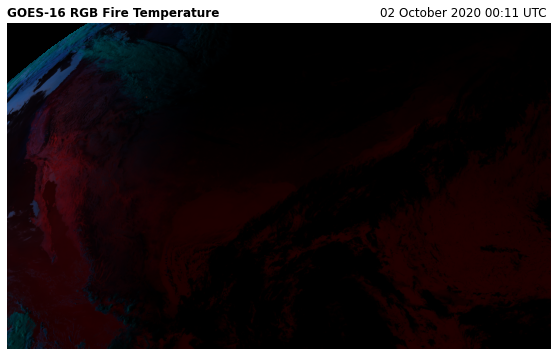

In [20]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,6))

# The RGB using the raw veggie band
ax1.imshow(RGB)
ax1.set_title('GOES-16 RGB Fire Temperature', fontweight='semibold', loc='left', fontsize=12);
ax1.set_title('%s' % scan_start.strftime('%d %B %Y %H:%M UTC '), loc='right');
ax1.axis('off')